# MNIST

In [1]:
from conx import Network, Layer, Conv2DLayer, MaxPool2DLayer, FlattenLayer

Using Theano backend.


In [2]:
net = Network("MNIST")
net.add(Layer("input", shape=784, vshape=(28, 28), colormap="hot", minmax=(0,1)))
net.add(Layer("hidden1", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("hidden2", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("output", shape=10, activation='softmax'))

net.connect('input', 'hidden1')
net.connect('hidden1', 'hidden2')
net.connect('hidden2', 'output')

In [3]:
net.compile(loss='mean_squared_error',
            optimizer='sgd')

In [4]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

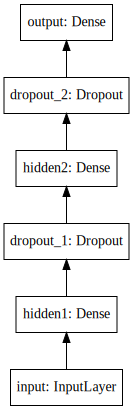

In [5]:
SVG(model_to_dot(net.model, rankdir="BT").create_svg())

In [6]:
from conx import Dataset

In [7]:
dataset = Dataset.get_mnist()
dataset.slice(0, 100)
dataset.reshape_inputs(784)
dataset.shuffle()
dataset.summary()

Input Summary:
   count  : 100 (100 for training, 0 for testing)
   shape  : (784,)
   range  : (0.0, 1.0)
Target Summary:
   count  : 100 (100 for training, 0 for testing)
   shape  : (10,)
   range  : (0.0, 1.0)


In [8]:
net.set_dataset(dataset)

In [9]:
widget = net.dashboard()

<IPython.core.display.Javascript object>

In [10]:
widget

In [11]:
net.train(100, verbose=0)
#net.test()

(100, 0.091418534517288208, 0.10000000149011612, 0.0)

In [12]:
%%time
for i in range(100):
    net.propagate(net.dataset.inputs[i])

CPU times: user 7.34 s, sys: 352 ms, total: 7.69 s
Wall time: 7.41 s


In [13]:
from conx import Network, Layer, Conv2DLayer, MaxPool2DLayer, FlattenLayer

In [14]:
net = Network("MNIST-CNN")
net.add(Layer("input", (28,28,1), colormap="hot", minmax=(0,1)))
net.add(Conv2DLayer("Conv2D-1", 16, (5,5), activation="relu"))
net.add(MaxPool2DLayer("maxpool1", (2,2)))
net.add(Conv2DLayer("Conv2D-2", 132, (5,5), activation="relu")) 
net.add(MaxPool2DLayer("maxpool2", (2,2)))
net.add(FlattenLayer("flatten", visible=False))
net.add(Layer("hidden", 1000, activation='relu', vshape=(8,125), image_maxdim=500))
net.add(Layer("output", 10, activation='softmax'))

net.connect()

In [15]:
net.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [16]:
ds = Dataset.get_mnist()

In [17]:
ds.slice(100)

In [18]:
net.set_dataset(ds)

In [19]:
net.train()

Training...
Epoch 1/1
100/100 [==============================] - 0s - loss: 0.3250 - acc: 0.9000
Epoch #    1 | train error 0.32504 | train accuracy 0.90000 | validate% 0.00000


In [20]:
net.dashboard()

<IPython.core.display.Javascript object>

In [21]:
for i in range(10):
    net.propagate(net.dataset.inputs[i])

In [22]:
net.train(epochs=100, accuracy=.7)

Training...
Epoch #    2 | train error 0.31498 | train accuracy 0.90200 | validate% 0.00000
Epoch #    3 | train error 0.30779 | train accuracy 0.90000 | validate% 0.00000
Epoch #    4 | train error 0.26022 | train accuracy 0.90000 | validate% 0.02000
Epoch #    5 | train error 0.17772 | train accuracy 0.93700 | validate% 0.06000
Epoch #    6 | train error 0.22144 | train accuracy 0.93500 | validate% 0.18000
Epoch #    7 | train error 0.15950 | train accuracy 0.93600 | validate% 0.16000
Epoch #    8 | train error 0.12746 | train accuracy 0.95000 | validate% 0.38000
Epoch #    9 | train error 0.06621 | train accuracy 0.98000 | validate% 0.39000
Epoch #   10 | train error 0.06449 | train accuracy 0.97900 | validate% 0.54000
Epoch #   11 | train error 0.09167 | train accuracy 0.97000 | validate% 0.45000
Epoch #   12 | train error 0.07900 | train accuracy 0.96600 | validate% 0.51000
Epoch #   13 | train error 0.06217 | train accuracy 0.98000 | validate% 0.74000
Epoch #   13 | train error 0